## On va débuter step by step 

### Inscription et récupération des données :

- Aller sur le site [Kaggle](https://www.kaggle.com) et inscrivez-vous
- Ensuite aller sur le contest du [Titanic](https://www.kaggle.com/c/titanic)
- Télécharger les données ```train.csv``` et ```test.csv``` dans [l'onglet data](https://www.kaggle.com/c/titanic/data)
- Mettez ces données dans un répertoire nommé ```input```

----------------------

Lancer votre notebook grâce à la commande dans votre terminal
```
jupyter notebook
```

In [7]:
# Importer les lib python
import pandas as pd

Petit rappel pour lire un fichier en local, utiliser la fonction ```read_csv```

Si vous avez des difficultés à utiliser une fonction, vous pouvez taper le nom de la fonction + "?" :
```
pd.read_csv?
```

*Pour fermer la fenêtre d'aide, cliquez sur la croix en haut à gauche de la fenêtre d'aide*

In [8]:
# Lire un fichier Train
train = pd.read_csv('input/train.csv')

Pour regarder un fichier, vous pouvez taper : 
    - le nom du DataFrame --> Afficher l'ensemble du DataFrame
    - Utiliser ".head()" --> Affiche les 5 premières lignes
    - Utiliser ".tail()" --> Affiche les 5 dernières lignes

In [9]:
# Regarder le début d'un DataFrame
train.head(17)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Signification des colonnes :
    - Survived : indique la mort ou la survie du passager pour les données d'apprentissage. C'est ce que l'on doit prédire sur fichier test. Cette valeur est booléene (0 ou 1) : 1 pour survie, 0 pour la mort
    - Pclass : La classe des chambres du navire (3 niveaux), 1 étant la meilleure classe et 3 la classe "éco". C'est une variable texte qui va falloir transformer en faisant attention car il y a une notion d'ordre.
    - Name : Nom de la personne
    - Sex : Sexe du passager
    - Age : âge du passager
    - SisbSp : (Sibling and Spouse) : le nombre de membres de la famille du passager de type frère, soeur, demi-frère, demi-soeur, époux, épouse...
    - Parch : (Parent and Child) : le nombre de membres de la famille du passager du type père, mère, fils, fille, beau-fils, etc...
    - Ticket : Numéro du ticket
    - Fare : le prix du ticket
    - Cabin : numéro de cabine
    - Embarked : le port d'embarquement du passager : C -> Cherbourg; Q -> Queenstown; S -> Southampton

In [10]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

**count()** permet de voir qu'il y a des données qui sont manquantes / absentes

## Faire un premier modèle simple :

On va crée un function python afin de faciler le reproduction par la suite

**Target** est donc notre cible (ce que l'on essaye de prédire')

In [76]:
def parse_model(X):
    """
    Parse mes données pour nourrir un algo.
    - Return :
        - X : features pour prédire le résutat
        - target : si la personne à survécu ou est morte
    """
    target = X.Survived
    X = X[['Fare', 'SibSp', 'Parch']]
    return X, target

In [77]:
X, y = parse_model(train.copy())

**X** sont nos données afin de déviner si le passager est mort ou non

In [13]:
X.head()

,Fare,SibSp,Parch
0,7.2500,1,0
1,71.2833,1,0
2,7.9250,0,0
3,53.1000,1,0
4,8.0500,0,0


**y** est la valeur booléen de survit ou non du Titanic

In [14]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [15]:
X.shape

(891, 3)

In [16]:
y.shape

(891,)

In [17]:

# Permet de valider notre modèle
from sklearn.cross_validation import cross_val_score, train_test_split

# Modèle linéaire
from sklearn.linear_model import LogisticRegression

/Users/babou/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
# Etape 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2017)

In [19]:
# Ce sont des Features :
print"X_train : " + str(X_train.shape)
print"X_test : " + str(X_test.shape)

# Ce sont des Targets :
print"y_train : " + str(y_train.shape)
print"y_test : " + str(y_test.shape)

X_train : (668, 3)
X_test : (223, 3)
y_train : (668,)
y_test : (223,)


In [20]:
X_train.tail()

,Fare,SibSp,Parch
810,7.8875,0,0
653,7.8292,0,0
454,8.0500,0,0
9,30.0708,1,0
571,51.4792,2,0


In [21]:
y_train.tail()

810    0
653    1
454    0
9      1
571    1
Name: Survived, dtype: int64

In [22]:
ma_regression = LogisticRegression() # On initialise notre algo

ma_regression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
#ma_regression?

In [24]:
ma_prediction = ma_regression.predict(X_test)
# ma_prediction est un array (= list)
ma_prediction[5:10] # On affiche les 5 premiers résultats

array([0, 0, 0, 0, 0])

In [25]:
y_test[5:10]

271    1
93     0
560    0
233    1
11     1
Name: Survived, dtype: int64

In [26]:
# Mon score de précision sur mes données d'apprentissage
ma_regression.score(X_train, y_train)

0.66616766467065869

In [27]:
# Etape 2
# Function de score
from sklearn.metrics import accuracy_score

accuracy_score(y_test, ma_prediction)

0.72197309417040356

On peux voir en changeant le chiffre du paramêtre **random_state** de  **train_test_split** (étape 1) que le résultat du score sur les données d'apprentissage et sur les données test change

D'ailleurs l'étape 2 est égal : 

In [28]:
accuracy_score(y_train, ma_regression.predict(X_train))

0.66616766467065869

### Utilisation de la cross_validation (CV) :

In [29]:
from sklearn.cross_validation import cross_val_score


def cross_validation_score(algo, X, y):
    """
    Utilise une cross validation sur un algo et return tout ses scores
    """
    score_cv = cross_val_score(algo, X, y, cv=5)
    return score_cv

In [30]:
mon_score = cross_validation_score(ma_regression, X, y)

In [31]:
print "Voila le résultat de la CV " + str(mon_score)

Voila le résultat de la CV [ 0.59776536  0.74301676  0.66853933  0.6741573   0.68926554]


In [32]:
print "Voila la moyenne de la CV " + str(mon_score.mean())

Voila la moyenne de la CV 0.674548857768


### Submission :

Charger le fichier test :

In [33]:
test = pd.read_csv("input/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
X_test.head()

,Fare,SibSp,Parch
809,53.1000,1,0
5,8.4583,0,0
232,13.5000,0,0
682,9.2250,0,0
666,13.0000,0,0


In [35]:
test[['Fare', 'SibSp', 'Parch']].head()

,Fare,SibSp,Parch
0,7.8292,0,0
1,7.0000,1,0
2,9.6875,0,0
3,8.6625,0,0
4,12.2875,1,1


In [78]:
# Etape 3
# On fit notre algo
ma_regression.fit(X, y)
use_features = ['Fare', 'SibSp', 'Parch']
prediction = ma_regression.predict(test[use_features])
# Error

**Il semble que nos données de test soient NaN (absentes)**

In [37]:
pd.isnull(test[use_features]).sum()

Fare     1
SibSp    0
Parch    0
dtype: int64

In [38]:
test[pd.isnull(test.Fare)][use_features]

,Fare,SibSp,Parch
152,NaN,0,0


On va donc remplacer cette valeur manquante : 
    - Soit on choisit une valeur subjective
    - On prend la valeur la plus adéquate sur notre jeux de données **train** (comme la médiane)

In [39]:
# Lib de calcul
import numpy as np

mediane_fare = np.median(train['Fare'])
print "La medianne de Fare dans notre jeu de données train est : " + str(mediane_fare)

La medianne de Fare dans notre jeu de données train est : 14.4542


Il faut donc remplacer la / les valeurs manquantes de **Fare** dans notre jeu de données **test** par la médiane calculé

In [40]:
test['Fare'] = test['Fare'].fillna(mediane_fare)
test[pd.isnull(test.Fare)][use_features] # Plus de Fare NaN

,Fare,SibSp,Parch


On reprendre notre étape 3 :

In [41]:
# Etape 3 bis
# On fit notre algo
ma_regression.fit(X, y)
use_features = ['Fare', 'SibSp', 'Parch']
test['Fare'] = test['Fare'].fillna(mediane_fare)   # notre fix /!\
prediction = ma_regression.predict(test[use_features])

In [42]:
print prediction

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 0 0 0 1 0 0 1 0 0 0]


In [43]:
test.shape

(418, 11)

In [44]:
len(prediction)

418

In [45]:
# On ajoute notre prédiction sur notre jeux de données test
test['Survived'] = prediction
fichier_prediction = test[['PassengerId', 'Survived']]
fichier_prediction.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [46]:
train.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [47]:
fichier_prediction.Survived.value_counts(normalize=True)

0    0.834928
1    0.165072
Name: Survived, dtype: float64

**Créer un dossier "output" au même niveau que le dossier "input"**

In [48]:
# Ecrire un fichier à partir d'un DataFrame
fichier_prediction.to_csv('output/premier_test.csv', index=False)

Aller sur [Kaggle](https://www.kaggle.com/c/titanic/submissions/attach) et faite une submission afin de voir votre score :)

In [49]:
# 0.6555 est assez proche de notre CV

### Battre notre 1er modèle :

Comment faire mieux que notre premier modèle. Il faut garder en mémoire que l'on à utiliser seulement 3 features...

#### Etude de la features Pclass (classe des chambres)

In [50]:
# Pour afficher des images (pas besoin de taper cet import)
from IPython.display import Image
Image(url="http://i.giphy.com/9ABgKHIu3acWA.gif")

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
# Pour que les graphique s'affichent dans le notebook
%matplotlib inline 


In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


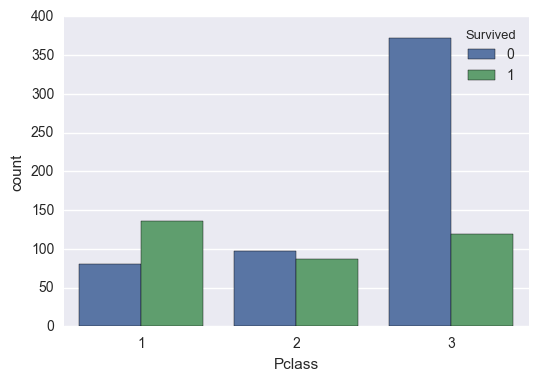

In [53]:
sns.countplot(train.Pclass, hue=train.Survived)

In [54]:
pd.get_dummies(train.Pclass, prefix="split_Pclass").head()

,split_Pclass_1,split_Pclass_2,split_Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [55]:
def parse_model_1(X):
    target = X.Survived
    X = X[['Fare', 'SibSp', 'Parch', 'Pclass']]   # Ajout d'une features
    
    # Pclass
    mes_dummy_Pclass = pd.get_dummies(X.Pclass, prefix="split_Pclass")
    X = X.join(mes_dummy_Pclass)
    X = X.drop('Pclass', axis=1)
    
    return X, target

In [56]:
X, y = parse_model_1(train)

In [57]:
X.head()

,Fare,SibSp,Parch,split_Pclass_1,split_Pclass_2,split_Pclass_3
0,7.2500,1,0,0,0,1
1,71.2833,1,0,1,0,0
2,7.9250,0,0,0,0,1
3,53.1000,1,0,1,0,0
4,8.0500,0,0,0,0,1


In [58]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [59]:
mon_score_2 = cross_validation_score(ma_regression, X, y)

In [60]:
mon_score_2

array([ 0.60335196,  0.69832402,  0.67977528,  0.71348315,  0.76836158])

In [61]:
print "Voila la moyenne de la CV " + str(mon_score_2.mean())

Voila la moyenne de la CV 0.692659197308


In [62]:
mon_score_2.mean()

0.6926591973081655

In [63]:
# 1er score = 0.674

In [64]:
# On recherche notre jeu de données test
mon_test = pd.read_csv("input/test.csv")

In [65]:
# Etape 3 bis
ma_regression.fit(X, y)
#use_features = ['Fare', 'SibSp', 'Parch', 'Pclass']
mon_test = mon_test[['Fare', 'SibSp', 'Parch', 'Pclass']]
mes_dummy_test = pd.get_dummies(mon_test.Pclass, prefix="split_Pclass")
mon_test = mon_test.join(mes_dummy_test)
mon_test = mon_test.drop('Pclass', axis=1)
mon_test['Fare'] = mon_test['Fare'].fillna(mediane_fare)

In [66]:
mon_test.head()

,Fare,SibSp,Parch,split_Pclass_1,split_Pclass_2,split_Pclass_3
0,7.8292,0,0,0,0,1
1,7.0000,1,0,0,0,1
2,9.6875,0,0,0,1,0
3,8.6625,0,0,0,0,1
4,12.2875,1,1,0,0,1


In [67]:
ma_regression.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [68]:
prediction = ma_regression.predict(mon_test)

In [69]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0,

In [70]:
# On ajoute notre prédiction sur notre jeux de données test
test['Survived'] = prediction
fichier_prediction = test[['PassengerId', 'Survived']]
fichier_prediction.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


## Interpréter notre algo : 

In [71]:
ma_regression.coef_

array([[ 0.00669907, -0.150896  ,  0.23357229,  0.3730938 ,  0.100852  ,
        -0.85258357]])

In [80]:
mon_resultat = pd.DataFrame({'coef' : ma_regression.coef_[0], 
                            'features' : X.columns})
#mon_resultat['coef'] = ma_regression.coef_[0]
#mon_resultat['features'] = ['Fare', 'SibSp', 'Parch', 'Pclass']

In [73]:
mon_resultat

,coef,features
0,0.006699,Fare
1,-0.150896,SibSp
2,0.233572,Parch
3,0.373094,split_Pclass_1
4,0.100852,split_Pclass_2
5,-0.852584,split_Pclass_3


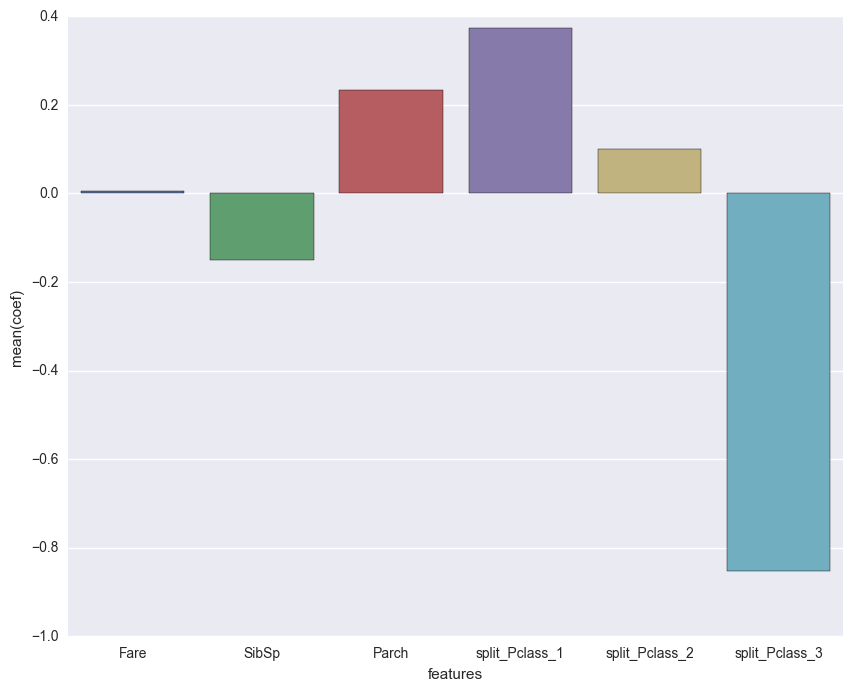

In [74]:
plt.figure(figsize=(10,8))
sns.barplot(x='features', y='coef', data=mon_resultat)

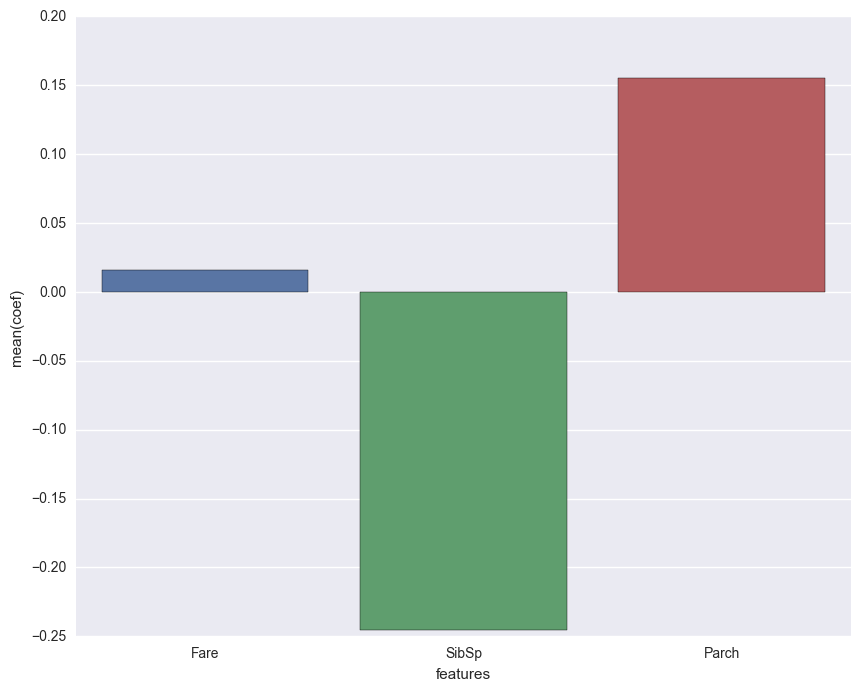

In [81]:
# 1 er modèle
# Reload le modèle 1
plt.figure(figsize=(10,8))
sns.barplot(x='features', y='coef', data=mon_resultat)

Un poid positif augmente la probalité de survie.
Un poid négatif diminue la probabilité de survie.

In [82]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Ajout du sexe :

In [83]:
def parse_model_2(X):
    target = X.Survived
    X = X[['Fare', 'SibSp', 'Parch', 'Pclass', 'Sex']]   # Ajout d'une features
    # Pclass
    mes_dummy_Pclass = pd.get_dummies(X.Pclass, prefix="split_Pclass")
    X = X.join(mes_dummy_Pclass)
    X = X.drop('Pclass', axis=1)
    # Sex
    mes_dummy_Sex = pd.get_dummies(X.Sex, prefix="split_Sex")
    X = X.join(mes_dummy_Sex)
    X = X.drop('Sex', axis=1)
    return X, target

In [84]:
X, y = parse_model_2(train.copy())

In [85]:
X.head()

,Fare,SibSp,Parch,split_Pclass_1,split_Pclass_2,split_Pclass_3,split_Sex_female,split_Sex_male
0,7.2500,1,0,0,0,1,0,1
1,71.2833,1,0,1,0,0,1,0
2,7.9250,0,0,0,0,1,1,0
3,53.1000,1,0,1,0,0,1,0
4,8.0500,0,0,0,0,1,0,1


In [86]:
mon_score_3 = cross_validation_score(ma_regression, X, y)

In [87]:
mon_score_3

array([ 0.80446927,  0.80446927,  0.78089888,  0.76966292,  0.81355932])

In [88]:
mon_score_3.mean()

0.79461193345454817

In [89]:
ma_regression.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [90]:
# On recherche notre jeu de données test
mon_test = pd.read_csv("input/test.csv")

#use_features = [['Fare', 'SibSp', 'Parch', 'Pclass']]
mon_test = mon_test[['Fare', 'SibSp', 'Parch', 'Pclass', 'Sex']]
# Pclass
mes_dummy_Pclass_test = pd.get_dummies(mon_test.Pclass, prefix="split_Pclass")
mon_test = mon_test.join(mes_dummy_Pclass_test)
mon_test = mon_test.drop('Pclass', axis=1)
# Sex
mes_dummy_Sex_test = pd.get_dummies(mon_test.Sex, prefix="split_Sex")
mon_test = mon_test.join(mes_dummy_Sex_test)
mon_test = mon_test.drop('Sex', axis=1)
# Autres 
mon_test['Fare'] = mon_test['Fare'].fillna(mediane_fare)

In [91]:
mon_test.head()

,Fare,SibSp,Parch,split_Pclass_1,split_Pclass_2,split_Pclass_3,split_Sex_female,split_Sex_male
0,7.8292,0,0,0,0,1,0,1
1,7.0000,1,0,0,0,1,1,0
2,9.6875,0,0,0,1,0,0,1
3,8.6625,0,0,0,0,1,0,1
4,12.2875,1,1,0,0,1,1,0


In [92]:
prediction = ma_regression.predict(mon_test)

In [93]:
prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [94]:
# On ajoute notre prédiction sur notre jeux de données test
test['Survived'] = prediction
fichier_prediction = test[['PassengerId', 'Survived']]
fichier_prediction.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [95]:
# Ecrire un fichier à partir d'un DataFrame
fichier_prediction.to_csv('output/test_3.csv', index=False)

### Ajout d'une features "Enfant" :

In [96]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [97]:
def parse_model_3(X):
    target = X.Survived
    X = X[['Fare', 'SibSp', 'Parch', 'Pclass', 'Sex', 'Age']]   # Ajout d'une features
    # Pclass
    mes_dummy_Pclass = pd.get_dummies(X.Pclass, prefix="split_Pclass")
    X = X.join(mes_dummy_Pclass)
    X = X.drop('Pclass', axis=1)
    # Sex
    mes_dummy_Sex = pd.get_dummies(X.Sex, prefix="split_Sex")
    X = X.join(mes_dummy_Sex)
    X = X.drop('Sex', axis=1)
    # Enfant oui ou non ?
    X['enfant'] = 0
    X.loc[X.Age <= 10, 'enfant'] = 1
    X = X.drop('Age', axis=1)
    return X, target

In [98]:
X, y = parse_model_3(train.copy())

In [99]:
X.head()

,Fare,SibSp,Parch,split_Pclass_1,split_Pclass_2,split_Pclass_3,split_Sex_female,split_Sex_male,enfant
0,7.2500,1,0,0,0,1,0,1,0
1,71.2833,1,0,1,0,0,1,0,0
2,7.9250,0,0,0,0,1,1,0,0
3,53.1000,1,0,1,0,0,1,0,0
4,8.0500,0,0,0,0,1,0,1,0


In [100]:
X.enfant.value_counts(normalize=True)

0    0.928171
1    0.071829
Name: enfant, dtype: float64

In [101]:
mon_score_4 = cross_validation_score(ma_regression, X, y)

In [102]:
mon_score_4

array([ 0.80446927,  0.81005587,  0.78651685,  0.7752809 ,  0.81355932])

In [103]:
mon_score_4.mean()

0.79797644290153835

In [104]:
# On recherche notre jeu de données test
mon_test = pd.read_csv("input/test.csv")

#use_features = [['Fare', 'SibSp', 'Parch', 'Pclass']]
mon_test = mon_test[['Fare', 'SibSp', 'Parch', 'Pclass', 'Sex','Age']]
# Pclass
mes_dummy_Pclass_test = pd.get_dummies(mon_test.Pclass, prefix="split_Pclass")
mon_test = mon_test.join(mes_dummy_Pclass_test)
mon_test = mon_test.drop('Pclass', axis=1)
# Sex
mes_dummy_Sex_test = pd.get_dummies(mon_test.Sex, prefix="split_Sex")
mon_test = mon_test.join(mes_dummy_Sex_test)
mon_test = mon_test.drop('Sex', axis=1)
# Enfant oui ou non ?
mon_test['enfant'] = 0
mon_test.loc[mon_test.Age <= 10, 'enfant'] = 1
mon_test = mon_test.drop('Age', axis=1)
# Autres 
mon_test['Fare'] = mon_test['Fare'].fillna(mediane_fare)

In [105]:
mon_test.head()

,Fare,SibSp,Parch,split_Pclass_1,split_Pclass_2,split_Pclass_3,split_Sex_female,split_Sex_male,enfant
0,7.8292,0,0,0,0,1,0,1,0
1,7.0000,1,0,0,0,1,1,0,0
2,9.6875,0,0,0,1,0,0,1,0
3,8.6625,0,0,0,0,1,0,1,0
4,12.2875,1,1,0,0,1,1,0,0


In [106]:
ma_regression.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [107]:
prediction = ma_regression.predict(mon_test)

In [108]:
prediction

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [109]:
# On ajoute notre prédiction sur notre jeux de données test
test['Survived'] = prediction
fichier_prediction = test[['PassengerId', 'Survived']]
fichier_prediction.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [110]:
# Ecrire un fichier à partir d'un DataFrame
fichier_prediction.to_csv('output/test_4.csv', index=False)

In [111]:
mon_resultat = pd.DataFrame({'coef' : ma_regression.coef_[0], 
                            'features' : X.columns})
#mon_resultat['coef'] = ma_regression.coef_[0]
#mon_resultat['features'] = ['Fare', 'SibSp', 'Parch', 'Pclass']

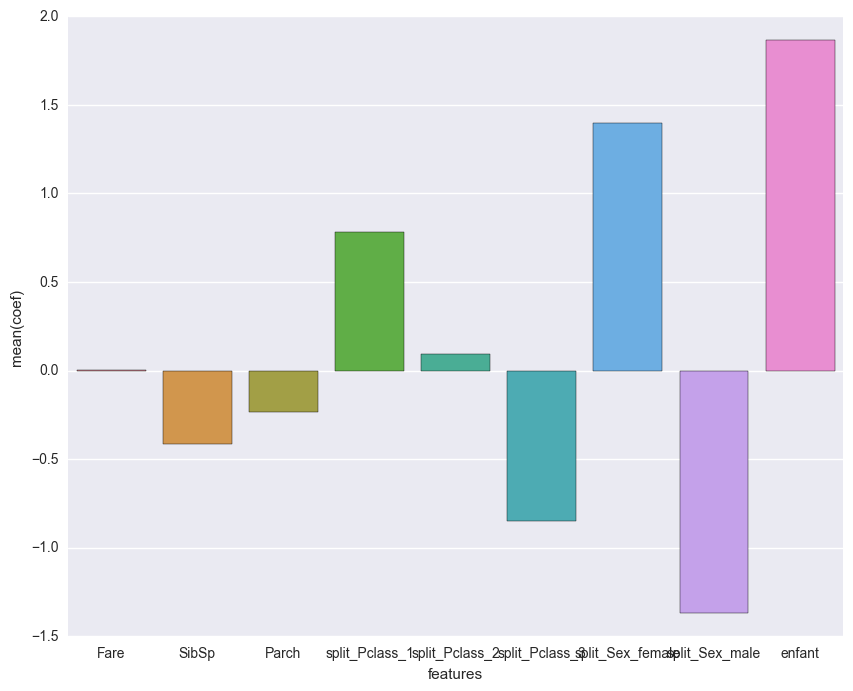

In [112]:
plt.figure(figsize=(10,8))
sns.barplot(x='features', y='coef', data=mon_resultat)

### Améliorer l'age : 

In [179]:
def parse_model_4(X):
    target = X.Survived
    X = X[['Fare', 'SibSp', 'Parch', 'Pclass', 'Sex', 'Age']]   # Ajout d'une features
    # Pclass
    mes_dummy_Pclass = pd.get_dummies(X.Pclass, prefix="split_Pclass")
    X = X.join(mes_dummy_Pclass)
    X = X.drop('Pclass', axis=1)
    # Sex
    mes_dummy_Sex = pd.get_dummies(X.Sex, prefix="split_Sex")
    X = X.join(mes_dummy_Sex)
    X = X.drop('Sex', axis=1)
    # Amélioration de la données Age (processing à faire avant la variable "Enfant" car impacté)
    ## Nécessaire pour réaliser une série qui ressemble à la série de point d'origine :
    mean_age   = X["Age"].mean()
    std_age = X["Age"].std()
    nbr_age_nan = X["Age"].isnull().sum()
    
    new_age = np.random.randint(mean_age - std_age, mean_age + std_age, size = nbr_age_nan)
    X.loc[pd.isnull(X['Age']), 'Age'] = new_age # Lorsque "Age" est NaN -> On ajoute un valeur simuler 

    
    # Enfant oui ou non ?
    X['enfant'] = 0
    X.loc[X.Age <= 10, 'enfant'] = 1
    #X = X.drop('Age', axis=1)   # Attention cette fois on laisse Age en features :
    return X, target

In [180]:
X, y = parse_model_4(train.copy())

In [181]:
X.head()

,Fare,SibSp,Parch,Age,split_Pclass_1,split_Pclass_2,split_Pclass_3,split_Sex_female,split_Sex_male,enfant
0,7.2500,1,0,22.0,0,0,1,0,1,0
1,71.2833,1,0,38.0,1,0,0,1,0,0
2,7.9250,0,0,26.0,0,0,1,1,0,0
3,53.1000,1,0,35.0,1,0,0,1,0,0
4,8.0500,0,0,35.0,0,0,1,0,1,0


In [182]:
X.enfant.value_counts(normalize=True)

0    0.928171
1    0.071829
Name: enfant, dtype: float64

In [183]:
mon_score_5 = cross_validation_score(ma_regression, X, y)
mon_score_5

array([ 0.79888268,  0.79329609,  0.78651685,  0.78651685,  0.81920904])

In [184]:
mon_score_5.mean()
# Ancien meilleur = 0.79797

0.79688430367258234

In [151]:
# On recherche notre jeu de données test
mon_test = pd.read_csv("input/test.csv")

#use_features = [['Fare', 'SibSp', 'Parch', 'Pclass']]
mon_test = mon_test[['Fare', 'SibSp', 'Parch', 'Pclass', 'Sex','Age']]
# Pclass
mes_dummy_Pclass_test = pd.get_dummies(mon_test.Pclass, prefix="split_Pclass")
mon_test = mon_test.join(mes_dummy_Pclass_test)
mon_test = mon_test.drop('Pclass', axis=1)
# Sex
mes_dummy_Sex_test = pd.get_dummies(mon_test.Sex, prefix="split_Sex")
mon_test = mon_test.join(mes_dummy_Sex_test)
mon_test = mon_test.drop('Sex', axis=1)
# Amélioration Age : (On se base uniquement sur les données de Train pour calculer la moyenne / std ..)
mean_age   = X["Age"].mean()
std_age = X["Age"].std()
nbr_age_nan = mon_test["Age"].isnull().sum() # On prend le nombre de valeur NaN du test 
    
new_age = np.random.randint(mean_age - std_age, mean_age + std_age, size = nbr_age_nan)
mon_test.loc[pd.isnull(mon_test['Age']), 'Age'] = new_age # Lorsque "Age" est NaN -> On ajoute un valeur simuler 

# Enfant oui ou non ?
mon_test['enfant'] = 0
mon_test.loc[mon_test.Age <= 10, 'enfant'] = 1
#mon_test = mon_test.drop('Age', axis=1) # On ne supprime plus Age en variable.
# Autres 
mon_test['Fare'] = mon_test['Fare'].fillna(mediane_fare)

In [152]:
mon_test.head()

,Fare,SibSp,Parch,Age,split_Pclass_1,split_Pclass_2,split_Pclass_3,split_Sex_female,split_Sex_male,enfant
0,7.8292,0,0,34.5,0,0,1,0,1,0
1,7.0000,1,0,47.0,0,0,1,1,0,0
2,9.6875,0,0,62.0,0,1,0,0,1,0
3,8.6625,0,0,27.0,0,0,1,0,1,0
4,12.2875,1,1,22.0,0,0,1,1,0,0


In [185]:
ma_regression.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [186]:
prediction = ma_regression.predict(mon_test)

In [187]:
# On ajoute notre prédiction sur notre jeux de données test
test['Survived'] = prediction
fichier_prediction = test[['PassengerId', 'Survived']]
fichier_prediction.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [188]:
# Ecrire un fichier à partir d'un DataFrame
fichier_prediction.to_csv('output/test_5.csv', index=False)

In [192]:
mon_resultat = pd.DataFrame({'coef' : ma_regression.coef_[0], 
                            'features' : X.columns})

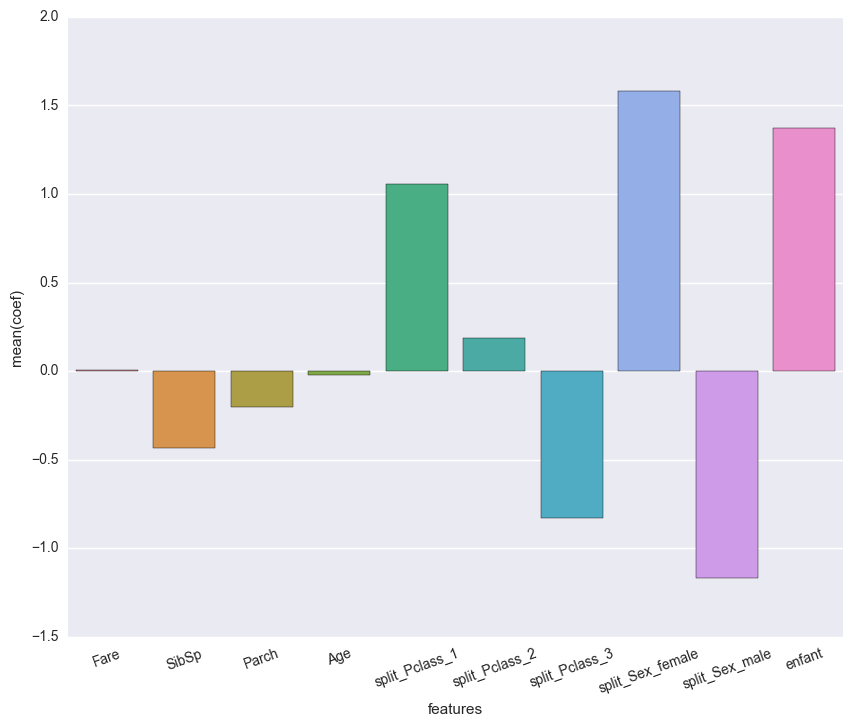

In [193]:
plt.figure(figsize=(10,8))
g = sns.barplot(x='features', y='coef', data=mon_resultat)
g.set_xticklabels(mon_resultat.features, rotation=20)  

### Mes prédiction / probabilité de survie

In [445]:
moi = pd.DataFrame()
moi['Fare']=30,
moi['SibSp']=1,
moi['Parch']=2,
moi['split_Pclass_1']=1,
moi['split_Pclass_2']=0,
moi['split_Pclass_3']=0,
moi['split_Sex_female']=0,
moi['split_Sex_male']=1,
moi['age']=31,
moi['enfant']=0



In [446]:
moi

,Fare,SibSp,Parch,split_Pclass_1,split_Pclass_2,split_Pclass_3,split_Sex_female,split_Sex_male,enfant
0,30,1,2,1,0,0,0,1,1


In [447]:
moi_prediction = ma_regression.predict(moi)

In [449]:
# 1 = survie / 0 = mort
print 'je suis ....' + str(moi_prediction)

je suis ....[1]


In [450]:
# Probabilité de survie
ma_regression.predict_proba(moi)[0][1]

0.63955770215074592

## Aller encore plus loin dans les prédictions :

In [284]:
def parse_model_6(X):
    target = X.Survived
    X = X[['Fare', 'SibSp', 'Parch', 'Pclass', 'Sex', 'Age']]   # Ajout d'une features
    # Pclass
    mes_dummy_Pclass = pd.get_dummies(X.Pclass, prefix="split_Pclass")
    X = X.join(mes_dummy_Pclass)
    X = X.drop('Pclass', axis=1)
    # Sex
    mes_dummy_Sex = pd.get_dummies(X.Sex, prefix="split_Sex")
    X = X.join(mes_dummy_Sex)
    X = X.drop('Sex', axis=1)
    # Amélioration de la données Age (processing à faire avant la variable "Enfant" car impacté)
    ## Nécessaire pour réaliser une série qui ressemble à la série de point d'origine :
    mean_age   = X["Age"].mean()
    std_age = X["Age"].std()
    nbr_age_nan = X["Age"].isnull().sum()
    
    new_age = np.random.randint(mean_age - std_age, mean_age + std_age, size = nbr_age_nan)
    X.loc[pd.isnull(X['Age']), 'Age'] = new_age # Lorsque "Age" est NaN -> On ajoute un valeur simuler 
    
    # Enfant oui ou non ?
    X['enfant'] = 0
    X.loc[X.Age <= 10, 'enfant'] = 1
    #X = X.drop('Age', axis=1)   # Attention cette fois on laisse Age en features :
    
    # Size familly :
    X['family_size'] = X['SibSp'] + X['Parch'] # Adding Here
    
    
    return X, target

In [285]:
X, y = parse_model_6(train.copy())

In [286]:
mon_score_6 = cross_validation_score(ma_regression, X, y)
mon_score_6

array([ 0.79888268,  0.79329609,  0.79775281,  0.7752809 ,  0.83050847])

In [287]:
mon_score_6.mean()
# Moins bien

0.79914419067823206

In [288]:
def parse_model_7(X):
    target = X.Survived
    X = X[['Fare', 'SibSp', 'Parch', 'Pclass', 'Sex', 'Age']]   # Ajout d'une features
    # Pclass
    mes_dummy_Pclass = pd.get_dummies(X.Pclass, prefix="split_Pclass")
    X = X.join(mes_dummy_Pclass)
    X = X.drop('Pclass', axis=1)
    # Sex
    mes_dummy_Sex = pd.get_dummies(X.Sex, prefix="split_Sex")
    X = X.join(mes_dummy_Sex)
    X = X.drop('Sex', axis=1)
    # Amélioration de la données Age (processing à faire avant la variable "Enfant" car impacté)
    ## Nécessaire pour réaliser une série qui ressemble à la série de point d'origine :
    mean_age   = X["Age"].mean()
    std_age = X["Age"].std()
    nbr_age_nan = X["Age"].isnull().sum()
    
    new_age = np.random.randint(mean_age - std_age, mean_age + std_age, size = nbr_age_nan)
    X.loc[pd.isnull(X['Age']), 'Age'] = new_age # Lorsque "Age" est NaN -> On ajoute un valeur simuler 
    
    # Enfant oui ou non ?
    X['enfant'] = 0
    X.loc[X.Age <= 10, 'enfant'] = 1
    #X = X.drop('Age', axis=1)   # Attention cette fois on laisse Age en features :
    
    # Size familly :
    X['family_size'] = X['SibSp'] + X['Parch']
    
    X['family_size_age'] = X['family_size'] * X['Age']
    
    
    return X, target

In [289]:
X, y = parse_model_7(train.copy())

In [290]:
mon_score_7 = cross_validation_score(ma_regression, X, y)
mon_score_7

array([ 0.81005587,  0.79888268,  0.7752809 ,  0.76966292,  0.83050847])

In [291]:
mon_score_7.mean()

0.79687816845740478

In [295]:
def parse_model_8(X):
    target = X.Survived
    X = X[['Fare', 'SibSp', 'Parch', 'Pclass', 'Sex', 'Age']]   # Ajout d'une features
    
    
    
    # Pclass
    mes_dummy_Pclass = pd.get_dummies(X.Pclass, prefix="split_Pclass")
    X = X.join(mes_dummy_Pclass)
    #X = X.drop('Pclass', axis=1)
    
    # Amélioration de la données Age (processing à faire avant la variable "Enfant" car impacté)
    ## Nécessaire pour réaliser une série qui ressemble à la série de point d'origine :
    #mean_age   = X["Age"].mean()
    #std_age = X["Age"].std()
    #nbr_age_nan = X["Age"].isnull().sum()
    
    #new_age = np.random.randint(mean_age - std_age, mean_age + std_age, size = nbr_age_nan)
    #X.loc[pd.isnull(X['Age']), 'Age'] = new_age # Lorsque "Age" est NaN -> On ajoute un valeur simuler 
    
    X.loc[pd.isnull(X['Age']), 'Age'] = X.Age.median()
    
    # Enfant oui ou non ?
    X['enfant'] = 0
    X.loc[X.Age <= 10, 'enfant'] = 1
    X.loc[X.enfant == 1,'Sex'] = 'Child' 
    X = X.drop('enfant', axis=1)   # Attention cette fois on laisse Age en features :
    
    # Update Enfent sex :
    # Sex
    mes_dummy_Sex = pd.get_dummies(X.Sex, prefix="split_Sex")
    X = X.join(mes_dummy_Sex)
    X = X.drop('Sex', axis=1)
    
    # Size familly :
    X['family_size'] = X['SibSp'] + X['Parch']
    
    # Strange Features
    X['age*Pclass'] = X['Pclass'] * X['Age']
    X = X.drop('Pclass', axis=1) 
    
    
    
    return X, target

In [296]:
X, y = parse_model_8(train.copy())

In [297]:
mon_score_8 = cross_validation_score(ma_regression, X, y)
mon_score_8.mean() # Meillieur score /!\

0.82383233201656725

In [298]:
ma_regression.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [299]:
mon_resultat = pd.DataFrame({'coef' : ma_regression.coef_[0], 
                            'features' : X.columns})

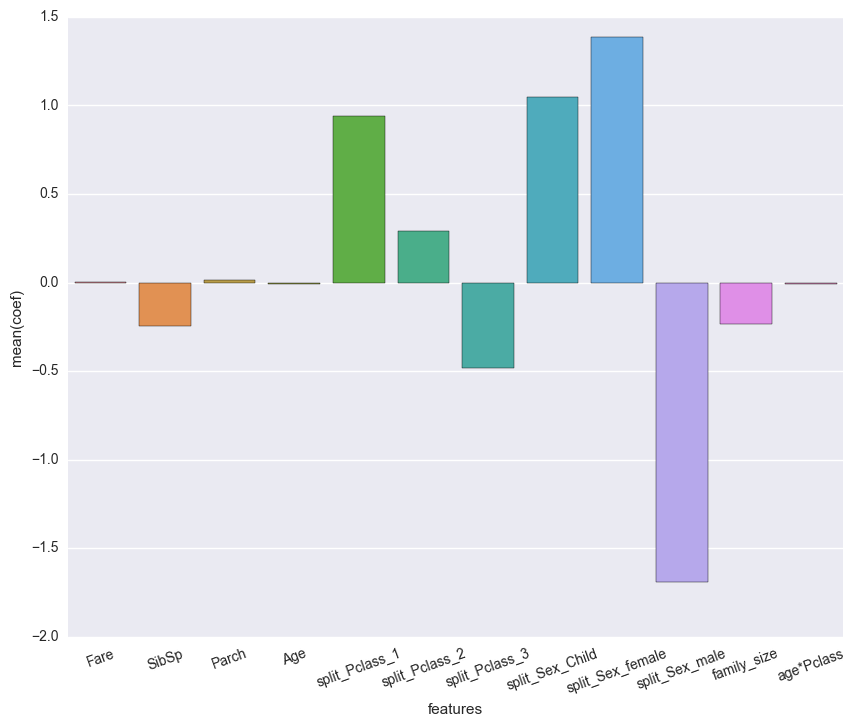

In [300]:
plt.figure(figsize=(10,8))
g = sns.barplot(x='features', y='coef', data=mon_resultat)
g.set_xticklabels(mon_resultat.features, rotation=20)  

## Maximiser l'information disponible :

In [306]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Nous n'avons pas encore analyse l'ensemble des colonnes disponibles...
La colonne ```Name``` peux offrir de précieuses informations, mais celle-ci est du texte

In [311]:
# Le titre est derrière la virgule
# Ensemble des titres que l'on récupère de cette façon
train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip()).value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Lady              1
Jonkheer          1
Don               1
Ms                1
Mme               1
Capt              1
the Countess      1
Sir               1
Name: Name, dtype: int64

In [313]:
train['Title'] = train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [317]:
train[train['Title'] == 'Rev']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,NaN,S,Rev
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,NaN,S,Rev
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,NaN,S,Rev
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,NaN,Q,Rev
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,NaN,S,Rev
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S,Rev


Maintenant que nous avons l'ensemble des titres, nous allons les regrouper

In [319]:
title_dict = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Lady" :      "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master"}

In [320]:
train['Title_grp'] = train['Title'].map(title_dict)

In [322]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_grp
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,Rev,Officer
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,Miss,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,Miss,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,Mr,Mr
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,Mr,Mr


In [328]:
def parse_model_9(X):
    target = X.Survived
    X = X[['Fare', 'SibSp', 'Parch', 'Pclass', 'Sex', 'Age', 'Name']]   # Ajout d'une features
    
    
    
    # Pclass
    mes_dummy_Pclass = pd.get_dummies(X.Pclass, prefix="split_Pclass")
    X = X.join(mes_dummy_Pclass)
    #X = X.drop('Pclass', axis=1)
    
    # Amélioration de la données Age (processing à faire avant la variable "Enfant" car impacté)
    ## Nécessaire pour réaliser une série qui ressemble à la série de point d'origine :
    #mean_age   = X["Age"].mean()
    #std_age = X["Age"].std()
    #nbr_age_nan = X["Age"].isnull().sum()
    
    #new_age = np.random.randint(mean_age - std_age, mean_age + std_age, size = nbr_age_nan)
    #X.loc[pd.isnull(X['Age']), 'Age'] = new_age # Lorsque "Age" est NaN -> On ajoute un valeur simuler 
    
    X.loc[pd.isnull(X['Age']), 'Age'] = X.Age.median()
    
    # Enfant oui ou non ?
    X['enfant'] = 0
    X.loc[X.Age <= 10, 'enfant'] = 1
    X.loc[X.enfant == 1,'Sex'] = 'Child' 
    X = X.drop('enfant', axis=1)   # Attention cette fois on laisse Age en features :
    
    # Update Enfent sex :
    # Sex
    mes_dummy_Sex = pd.get_dummies(X.Sex, prefix="split_Sex")
    X = X.join(mes_dummy_Sex)
    X = X.drop('Sex', axis=1)
    
    # Size familly :
    X['family_size'] = X['SibSp'] + X['Parch']
    
    # Strange Features
    X['age*Pclass'] = X['Pclass'] * X['Age']
    X = X.drop('Pclass', axis=1) 
    
    # Name
    X['Title'] = X['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
    
    X['Title_grp'] = X['Title'].map(title_dict)
    X = X.drop(['Title', 'Name'], axis=1)
    ## Dummy de Title grp
    mes_Title_grp = pd.get_dummies(X.Title_grp, prefix="is")
    X = X.join(mes_Title_grp)
    X = X.drop('Title_grp', axis=1)
    
    
    return X, target

In [329]:
X, y = parse_model_9(train.copy())

In [330]:
X.head()

,Fare,SibSp,Parch,Age,split_Pclass_1,split_Pclass_2,split_Pclass_3,split_Sex_Child,split_Sex_female,split_Sex_male,family_size,age*Pclass,is_Master,is_Miss,is_Mr,is_Mrs,is_Officer,is_Royalty
0,7.2500,1,0,22.0,0,0,1,0,0,1,1,66.0,0,0,1,0,0,0
1,71.2833,1,0,38.0,1,0,0,0,1,0,1,38.0,0,0,0,1,0,0
2,7.9250,0,0,26.0,0,0,1,0,1,0,0,78.0,0,1,0,0,0,0
3,53.1000,1,0,35.0,1,0,0,0,1,0,1,35.0,0,0,0,1,0,0
4,8.0500,0,0,35.0,0,0,1,0,0,1,0,105.0,0,0,1,0,0,0


In [332]:
mon_score_9 = cross_validation_score(ma_regression, X, y)
mon_score_9.mean() # moins bon... :'(

0.81485605118400772

In [333]:
ma_regression.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [334]:
mon_resultat = pd.DataFrame({'coef' : ma_regression.coef_[0], 
                            'features' : X.columns})

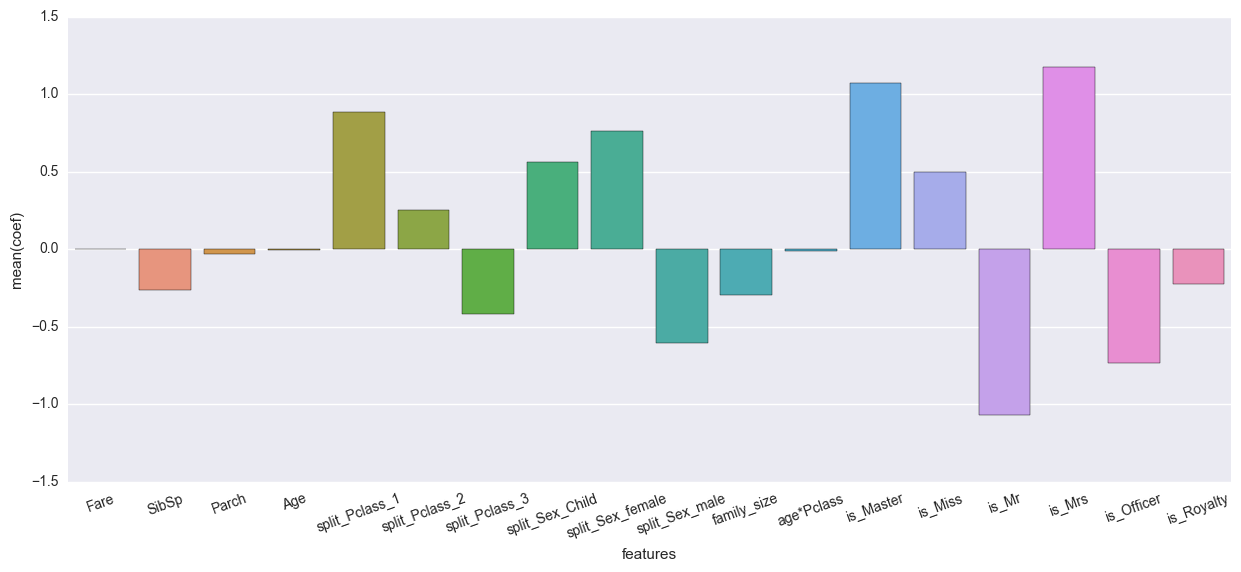

In [336]:
plt.figure(figsize=(15,6))
g = sns.barplot(x='features', y='coef', data=mon_resultat)
g.set_xticklabels(mon_resultat.features, rotation=20)  

## Comprendre les résultat des prédictions (avoir bon / avoir faux)

In [337]:
from sklearn import metrics

In [338]:
train_prediction = ma_regression.predict(X)

In [340]:
cm = metrics.confusion_matrix(y_true=y,  # True labels
                         y_pred=train_prediction) # Predicted labels
cm

array([[487,  62],
       [ 95, 247]])

In [341]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_normalized

array([[ 0.8870674 ,  0.1129326 ],
       [ 0.27777778,  0.72222222]])

([<matplotlib.axis.YTick at 0x1216a92d0>,
 <a list of 2 Text yticklabel objects>)

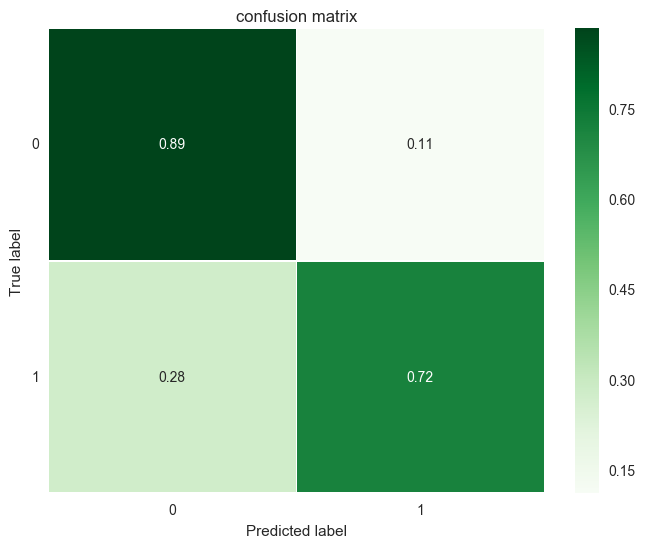

In [342]:
label_unique = y.unique()

# Graph Confusion Matrix
tick_marks = np.arange(len(label_unique))
plt.figure(figsize=(8,6))
sns.heatmap(cm_normalized, cmap='Greens',annot=True,linewidths=.5)
plt.title('confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(tick_marks + 0.5, list(label_unique))
plt.yticks(tick_marks + 0.5, list(reversed(list(label_unique))), rotation=0)


**On prédit correctement :**
- Dans 89 % des cas ou la personne est 0 en réalité (mort)
- dans 72 % des cas ou la personnes est 1 en réalité (en vie)


## Conclusion : 

Un algorithme ne sera jamais parfait ! On peux toujours le complexifier, il restera toujours des erreurs. Cependant il est important de bien comprendre ces erreurs. La bonne compréhension de celles-ci est une phase crucial dans l'analyse de données et dans la méthodologie  d'amélioration.

Dans le cadre d'un besoin d'entreprise, un BI pro-actif offre une vision sur un possible problème, laissant un certain temps de réaction pour le résoudre. De plus il offre aussi des indicateurs forts utiles (coeficients) pour l'aspect stratégique / métier.